In [ ]:
"""
File Name: original_data_visulization.ipynb

Description: data visulization of original data.

Author: junghwan lee
Email: jhrrlee@gmail.com
Date Created: 2023.09.04
"""

In [ ]:
import sys
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
sys.path.append('/content/drive/MyDrive/Colab_Notebooks')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/toyota_data/RUL_ML_Framework')
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/toyota_data/RUL_ML_Framework/data_analysis')
data_path = '/content/drive/MyDrive/Colab_Notebooks/toyota_data/data/'

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Colab_Notebooks/toyota_data/data/'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib.colors as colors
import matplotlib
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
from sklearn.preprocessing import MinMaxScaler
from scipy import interpolate
import importlib
import ori_visulization_lib as ca

In [ ]:
importlib.reload(ca)

<module 'ori_visulization_lib' from '/content/drive/MyDrive/Colab_Notebooks/toyota_data/RUL_ML_Framework/data_analysis/ori_visulization_lib.py'>

In [ ]:
with open(data_path+'bat_dict.pkl', 'rb') as f:
    bat_dict = pickle.load(f)

In [ ]:
len(bat_dict.keys())

124

## Summary data visualization
From [1], summary and cycle keys </br>
- summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg': summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT, 'cycle': summary_CY}  </br>
- cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}  </br>
</br>

Displays summary data for each cell in each plot per summary data.

In [ ]:
ca.plot_summary_all(bat_dict, 10)

Display specific summary data for all cell

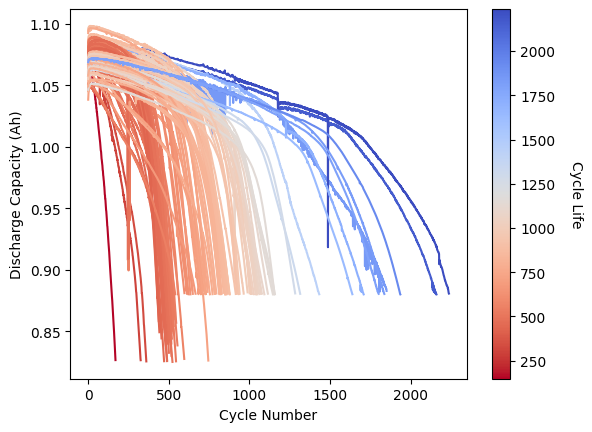

In [ ]:
ca.plot_summary_per_summarykey(bat_dict, 'QD', 'Discharge Capacity (Ah)')

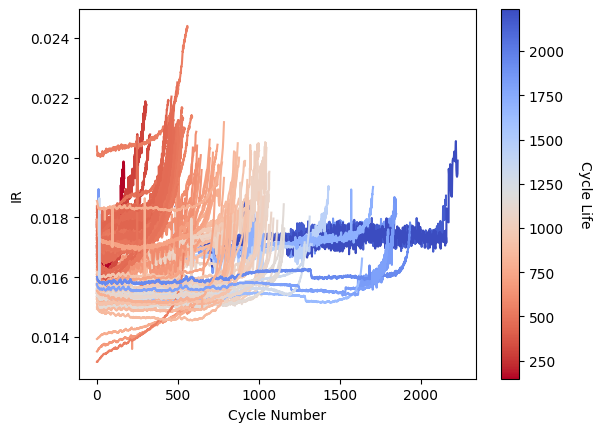

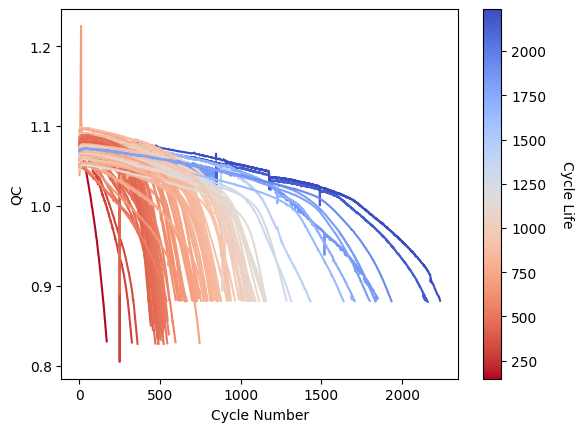

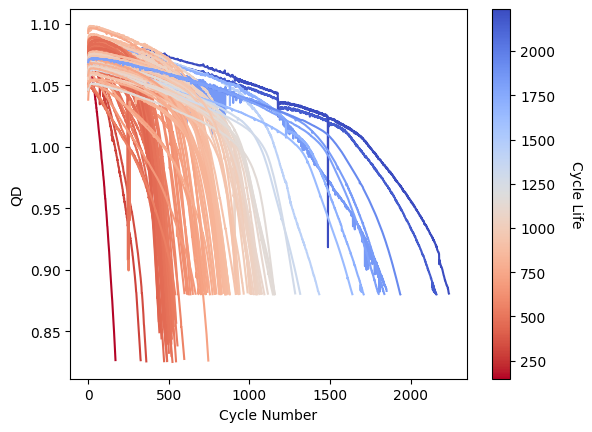

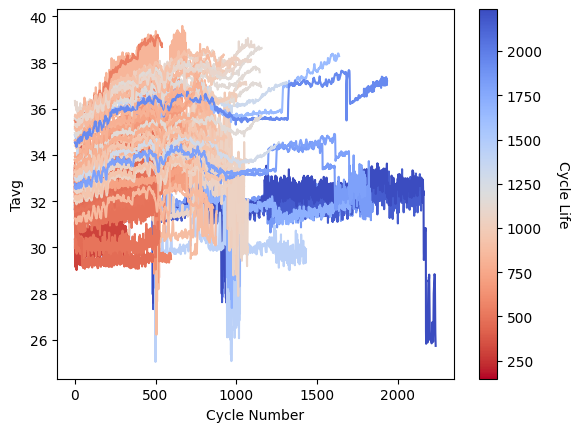

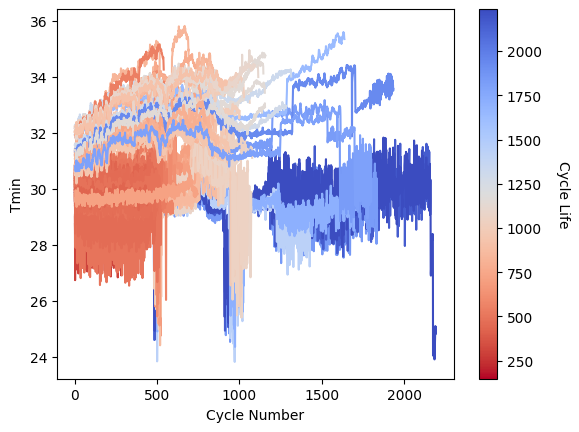

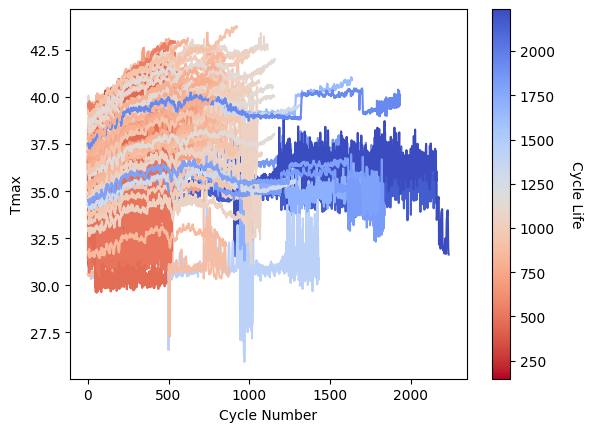

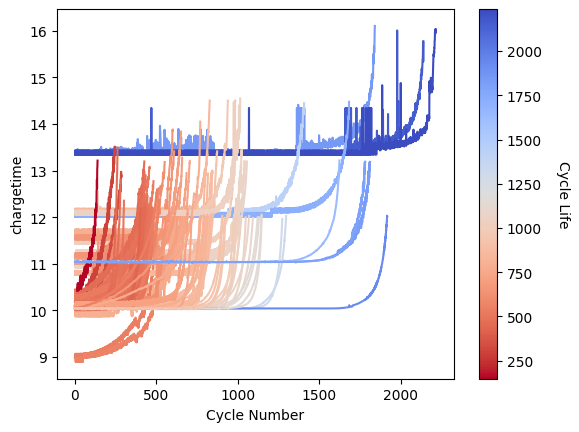

In [ ]:
ca.plot_all_cells_per_summary(bat_dict)

Sorting cell with median values that are used to sort cells since IR, QC, QD has abnormal values for some cycles

In [ ]:
IR_sorted_data = ca.sort_scores_by_median_with_key(bat_dict, summary_key='IR')

Sorting cycle life that is not in summary data

In [ ]:
cyclelife_sorted_data = ca.sort_cycle_life(bat_dict)

sorting cells using "sort_scores_by_median_with_key" and "plot_cycle_life" functions according to cycle life, IR, QC, etc

In [ ]:
sum_df = ca.gen_summary_df(bat_dict)

In [ ]:
sum_df.sort_values(by=['CL'], inplace=True)
sum_df

Cell Name    CL        IR        QC        QD       Tavg       Tmin  \
42       b2c1   148  0.017038  0.989987  0.988783  32.677675  29.249879   
41       b2c0   300  0.018262  1.002583  1.001969  30.373910  28.145517   
62       b2c3   335  0.017359  1.004968  1.004965  34.278945  30.133793   
80      b2c46   429  0.018316  1.069273  1.069346  32.937778  29.732035   
75      b2c41   429  0.017866  1.059571  1.059610  33.704704  30.265650   
..        ...   ...       ...       ...       ...        ...        ...   
121      b3c7  1836  0.015564  1.042248  1.042285  33.530975  31.928414   
0        b1c0  1852  0.017042  1.038362  1.038919  31.956353  29.353313   
112     b3c38  1935  0.015988  1.038736  1.038890  36.265389  32.742288   
1        b1c1  2160  0.017253  1.043152  1.043494  31.759170  29.623354   
9        b1c2  2237  0.017202  1.045800  1.046090  32.145734  29.721926   

          Tmax  Charge Time  
42   36.810606    11.041616  
41   32.565023    11.260891  
62   40.042107    10.829333  
80   38.585503    10.179915  
75   39.217941    10.178095  
..         ...          ...  
121  35.255032    11.039107  
0    36.363941    13.425898  
112  39.436256    10.043734  
1    34.936764    13.425708  
9    35.709536    13.425649  

[124 rows x 9 columns]

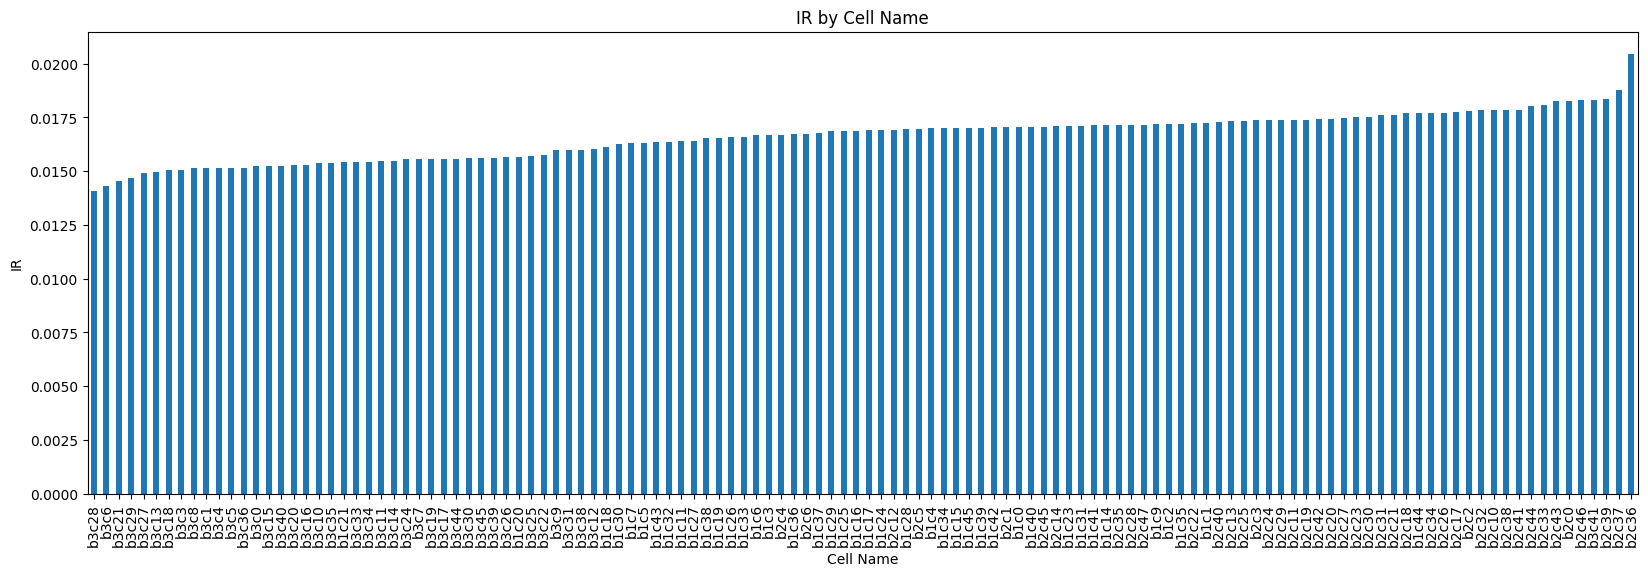

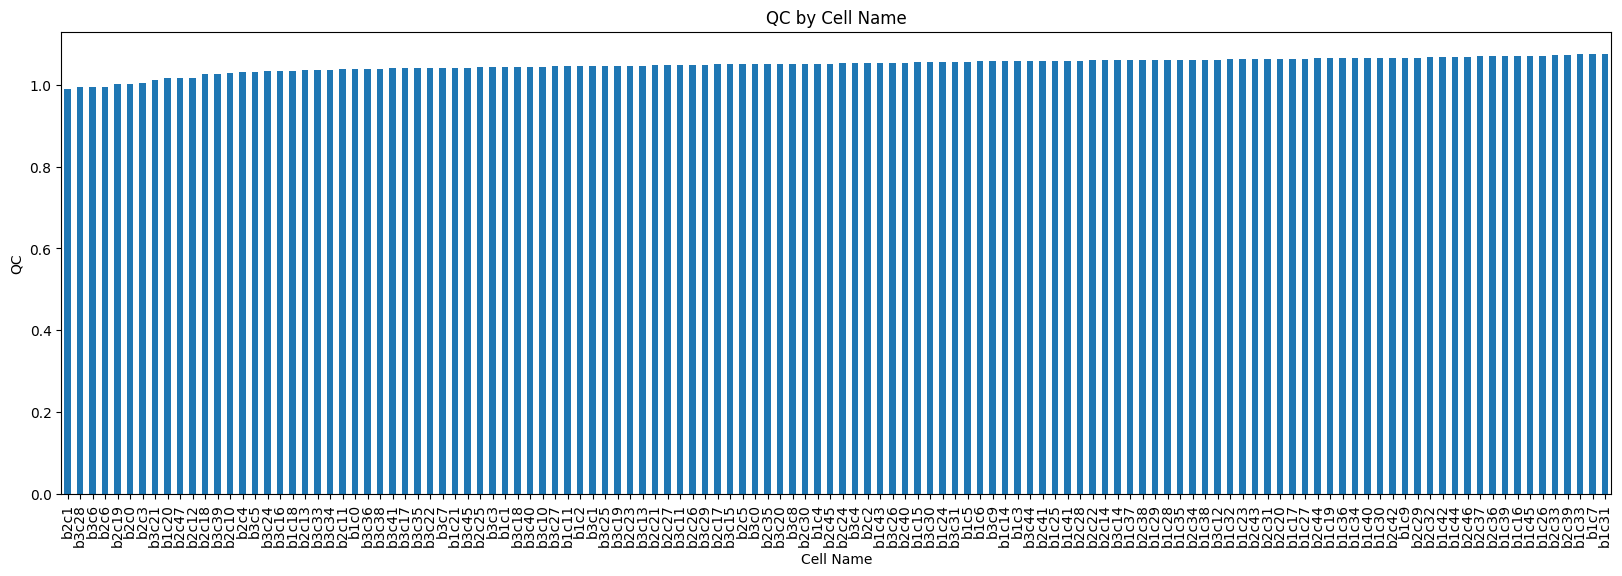

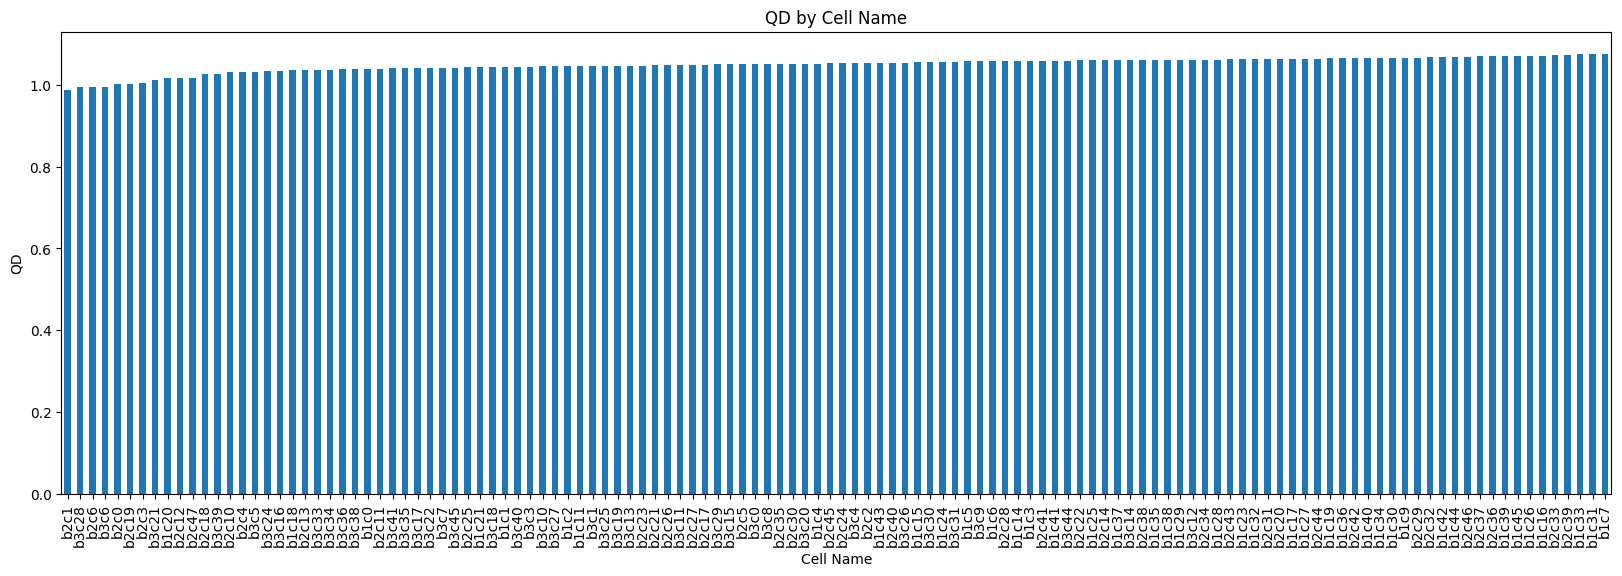

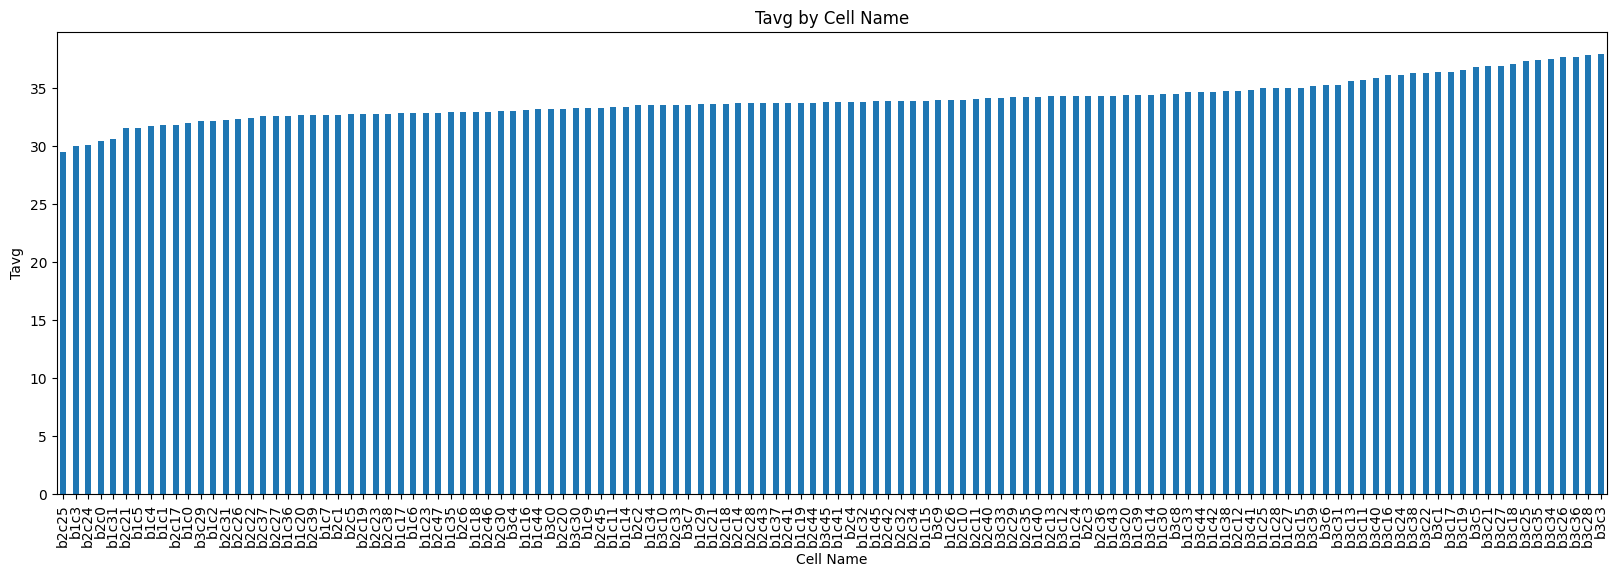

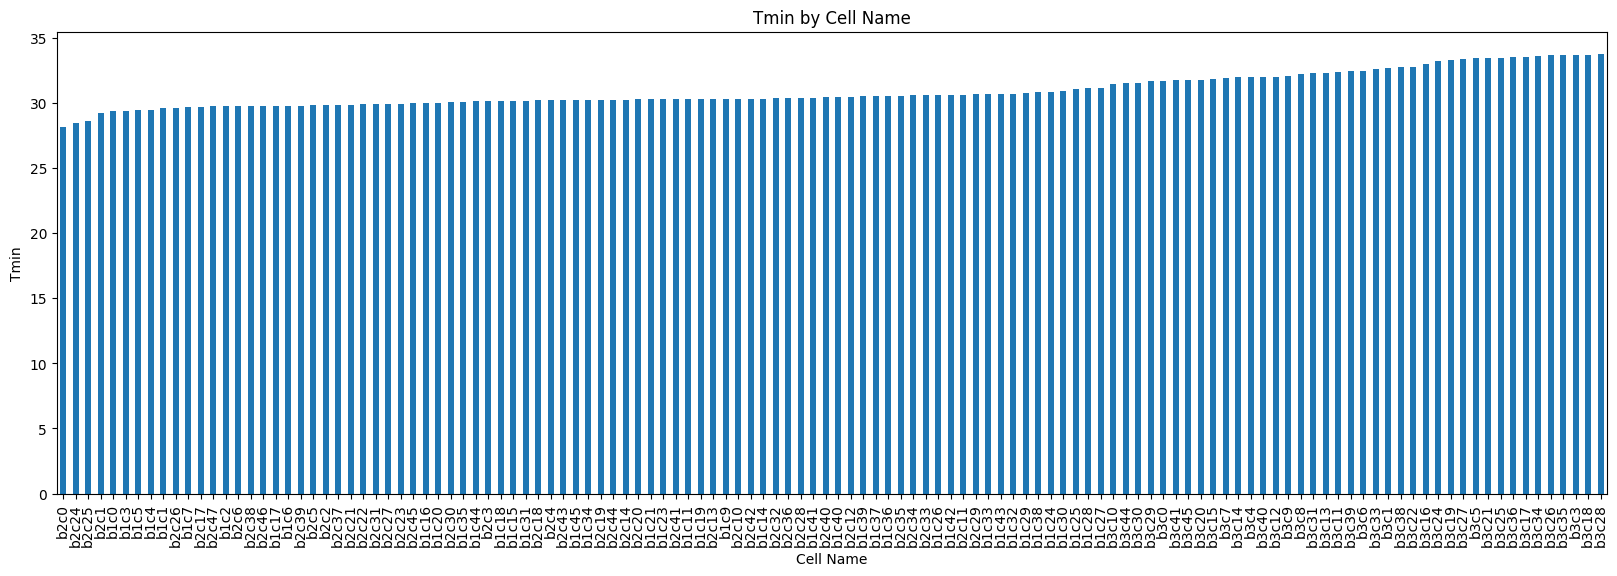

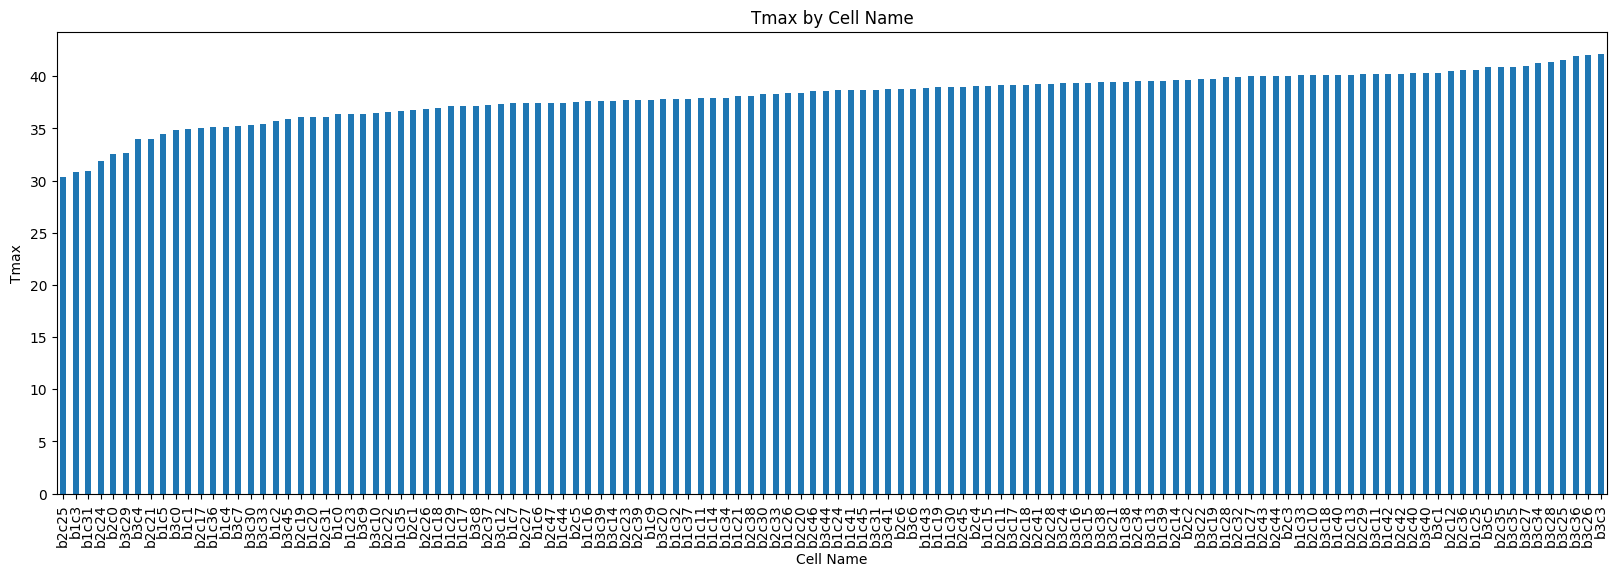

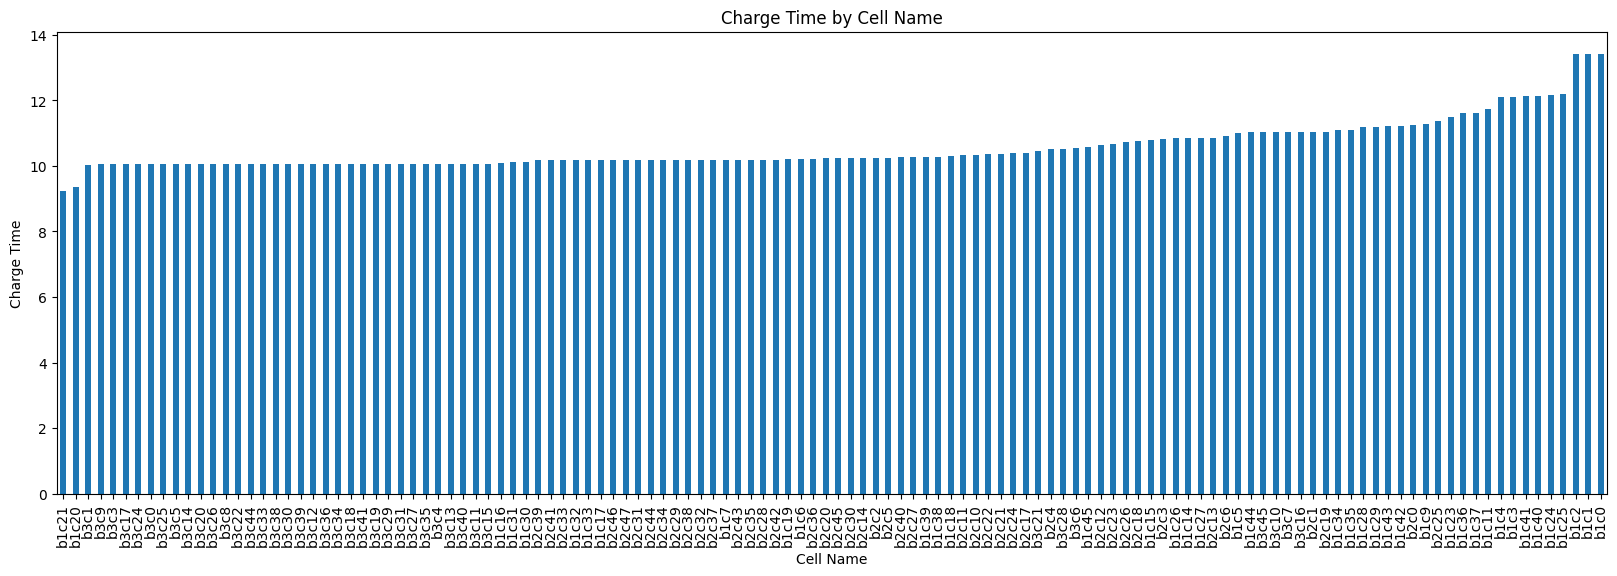

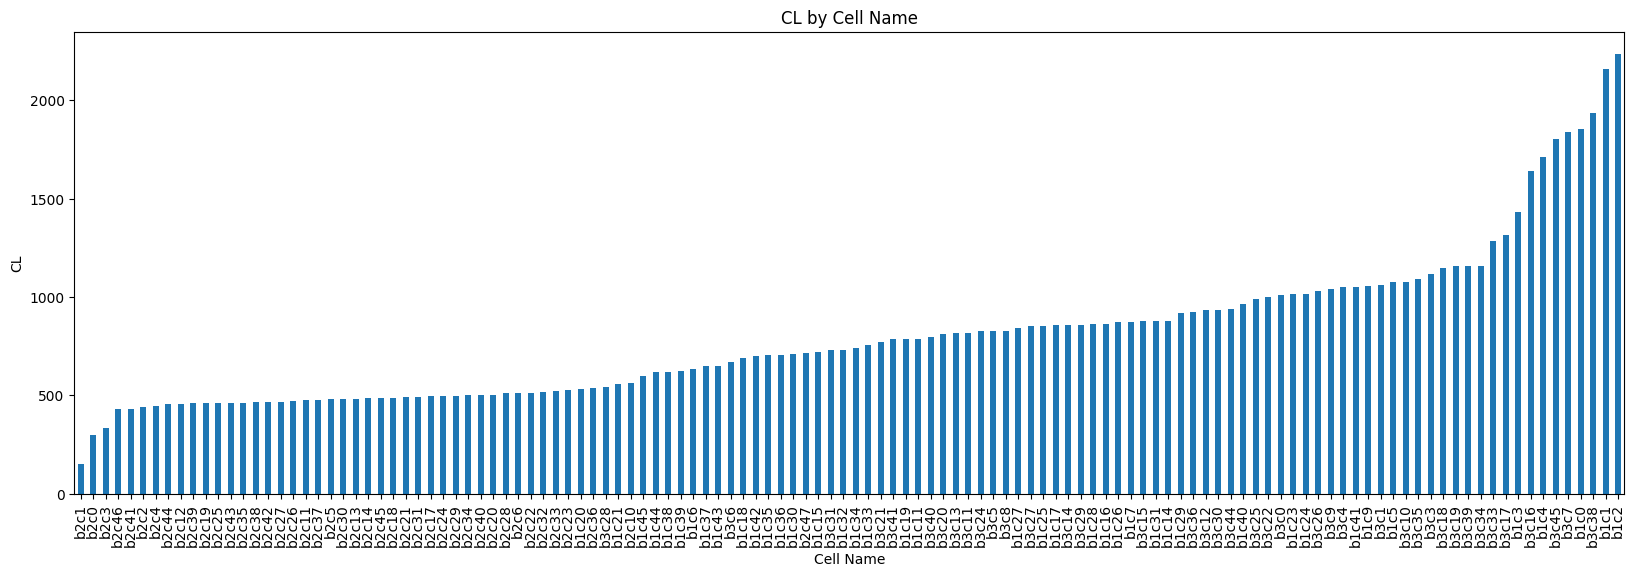

In [ ]:
parameters = ['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'Charge Time', 'CL']

for parameter in parameters:
    ca.sorted_bar_chart(sum_df, parameter)

## ## Cycle data visualization
Display cycle data of all cells for a attribute at specific cycle </br>
cycle_keys = ['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't']

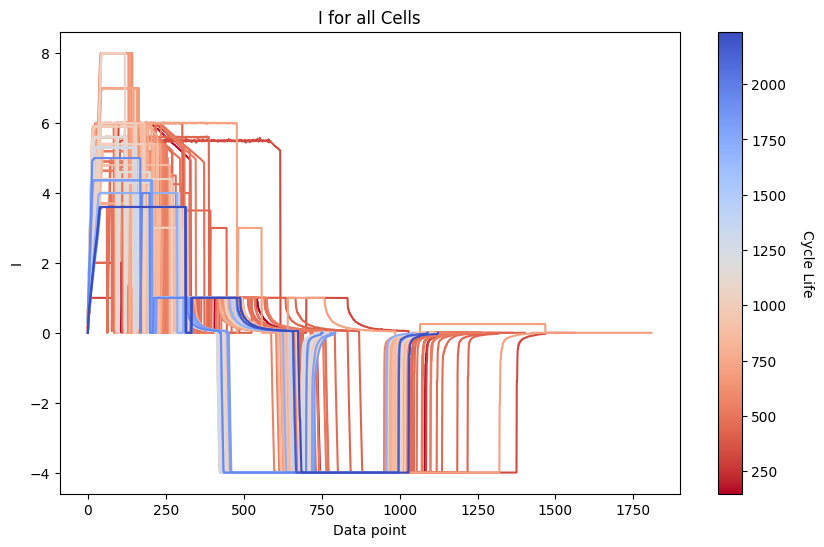

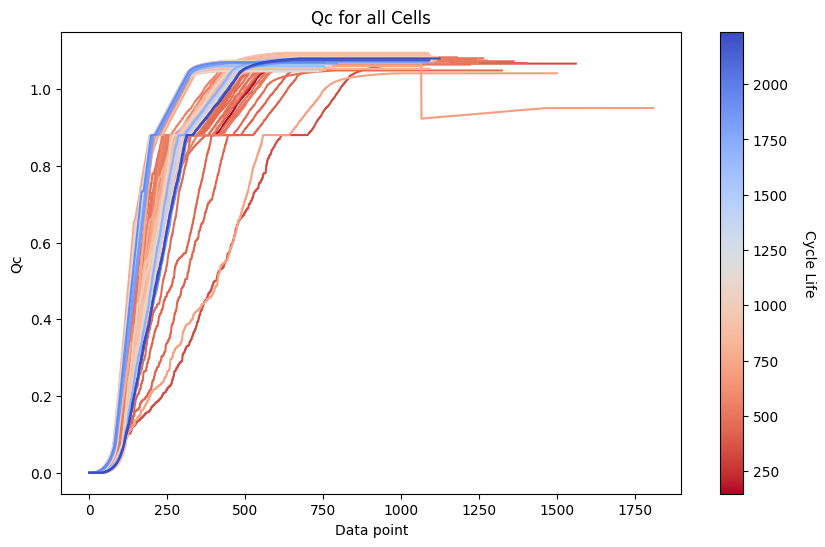

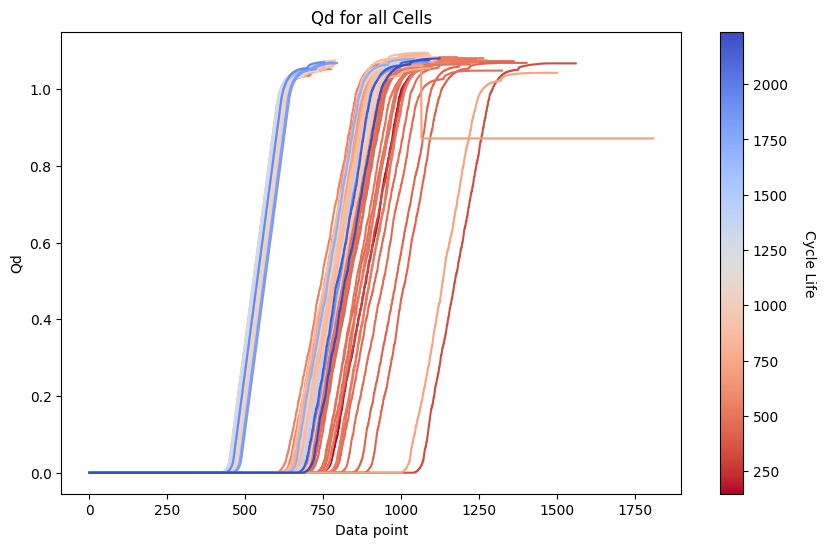

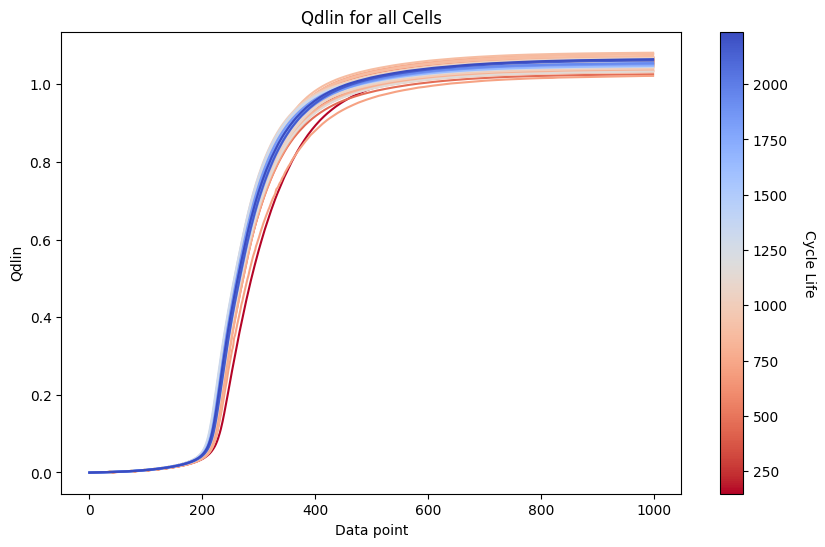

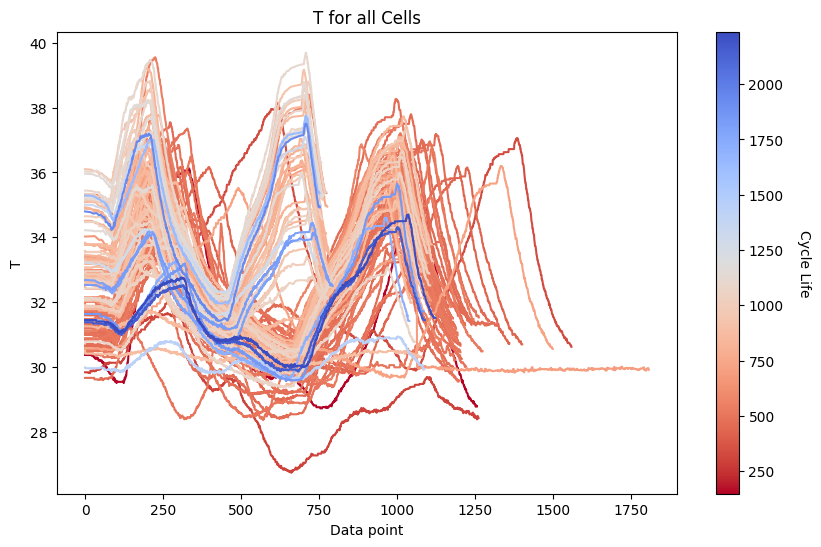

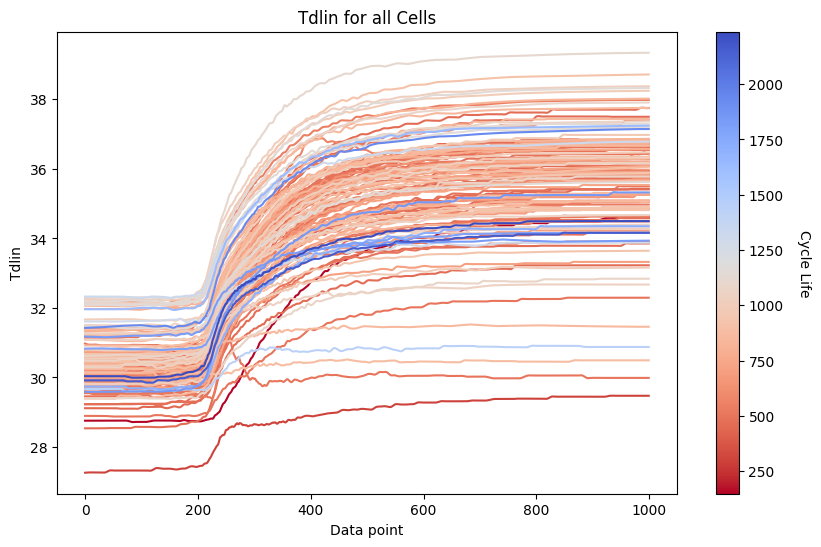

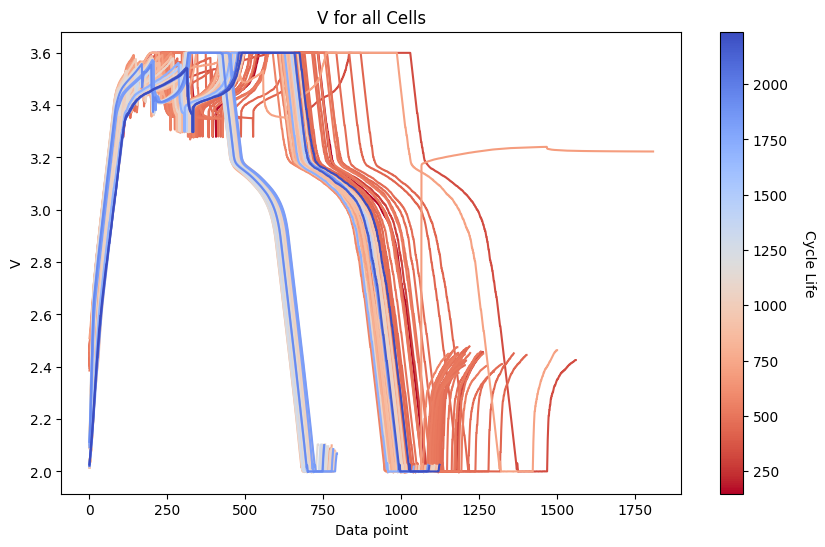

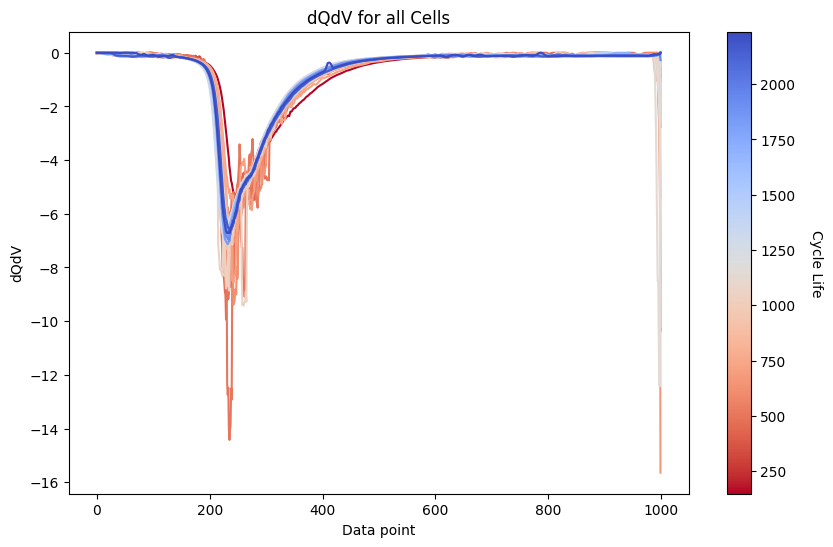

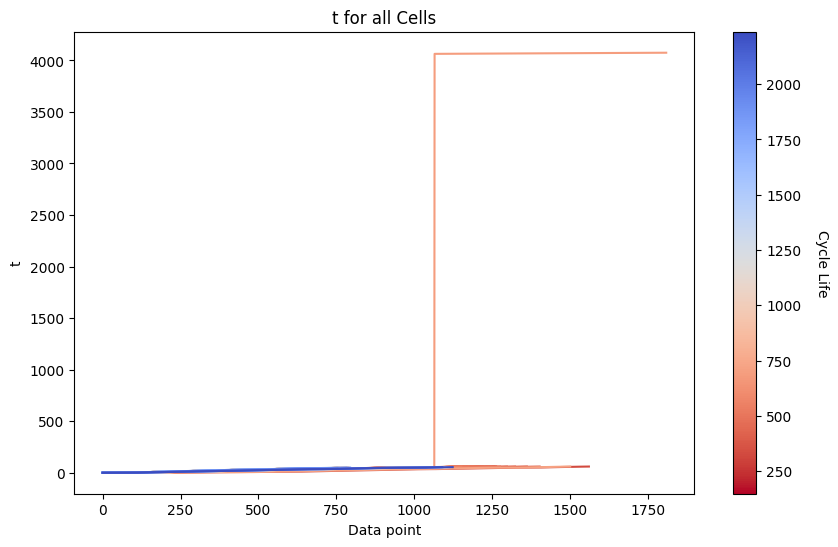

In [ ]:
cycle_keys = ['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't']

for cycle_key in cycle_keys:
    ca.plot_allcell_with_dkck(bat_dict, cycle_key, '1')

In [ ]:
"""
Plots the cycles of a given cell from a starting cycle and starting data point.

Parameters:
- bat_dict (dict): a dictionary containing battery data
- cell_name (str): the name of the cell to plot
- start_cycle (int): the starting cycle number to plot
- start_point (int): the starting data point to plot for each cycle
- end_margin (int): the ending data margin to plot for each cycle, starting to a cycle length - end_margin
"""

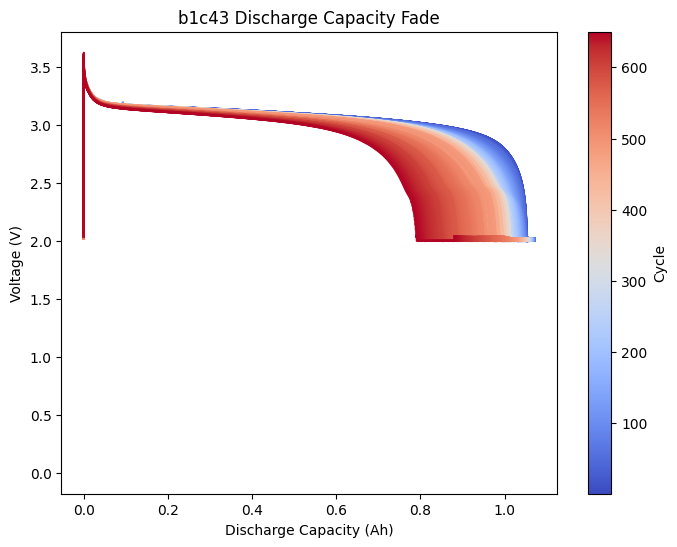

In [ ]:
# e.g, abnormal data exist in 0 index of cycles.
ca.plot_discharge_fade_bar(bat_dict, 'b1c43', 0, 0, 0)

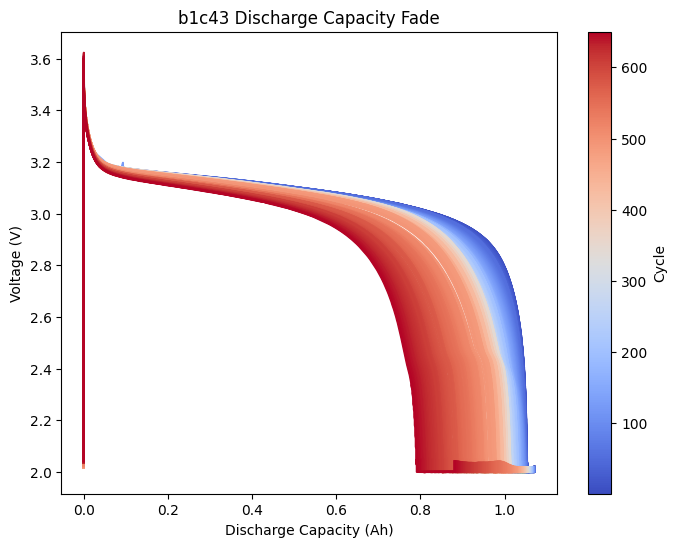

In [ ]:
# e.g, voltage jumps exist at start point.
ca.plot_discharge_fade_bar(bat_dict, 'b1c43', 1, 0, 0)

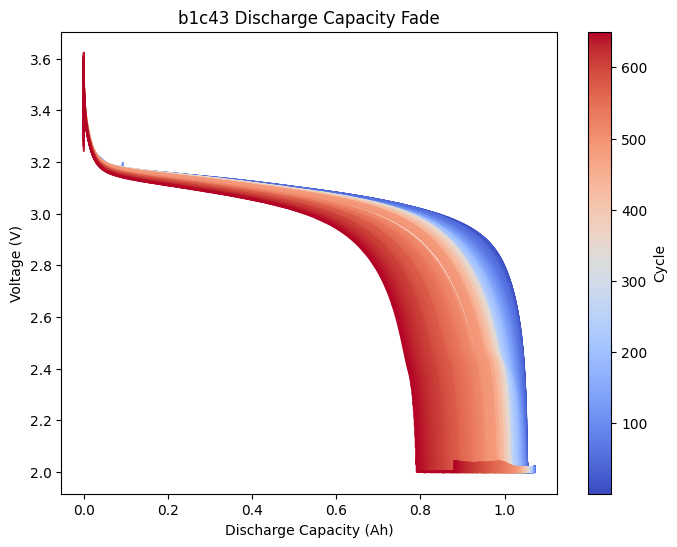

In [ ]:
# e.g, removes voltage jumps at start points.
ca.plot_discharge_fade_bar(bat_dict, 'b1c43', 1, 100, 0)

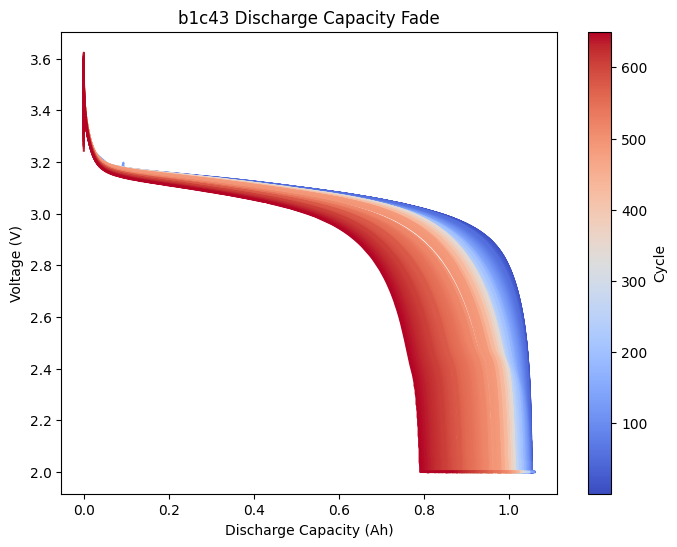

In [ ]:
# e.g, removes voltage jumps at end points.
ca.plot_discharge_fade_bar(bat_dict, 'b1c43', 1, 100, 100)

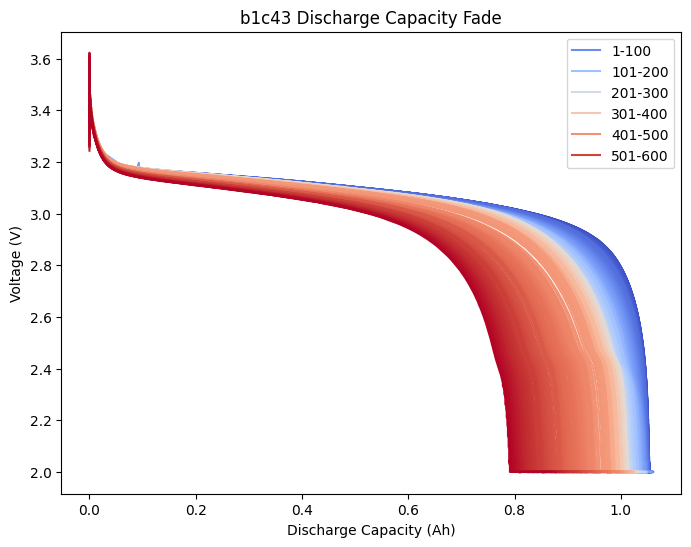

In [ ]:
ca.plot_discharge_fade(bat_dict, 'b1c43', 1, 100, 100)

Displays the cycle data of a specified data key 'dk' for a given cell 'cell_key' in a scatter plot. The plot includes a color bar representing the cycle number, and displays data from a specified starting cycle 'start_cycle' up to a maximum number of cycles 'no_of_cycles'.

Parameters:
- bat_dict (dict): a dictionary containing battery data
- cell_key (str): the name of the cell to plot
- dk (str): the data key to plot, e.g. 'Qd', 'V', 'I'
- start_cycle (int): the starting cycle number to plot
- no_of_cycles (int): the maximum number of cycles to plot

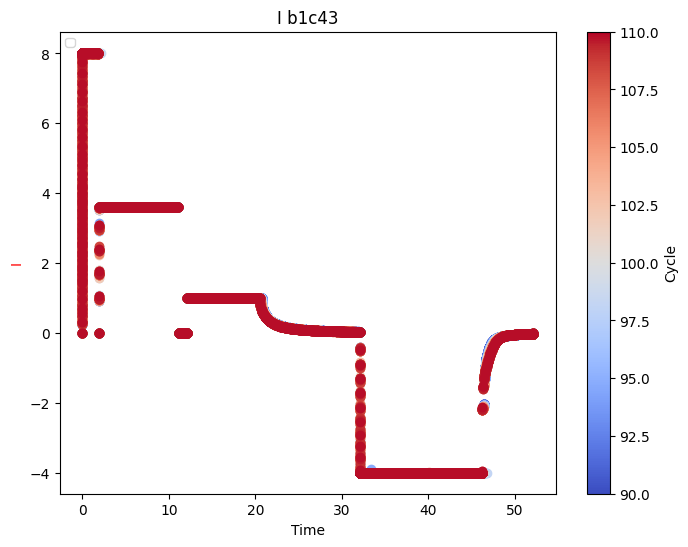

In [ ]:
#{'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
ca.v2_plot_cycledata_per_cell(bat_dict, 'b1c43', 'I', 100, 100)

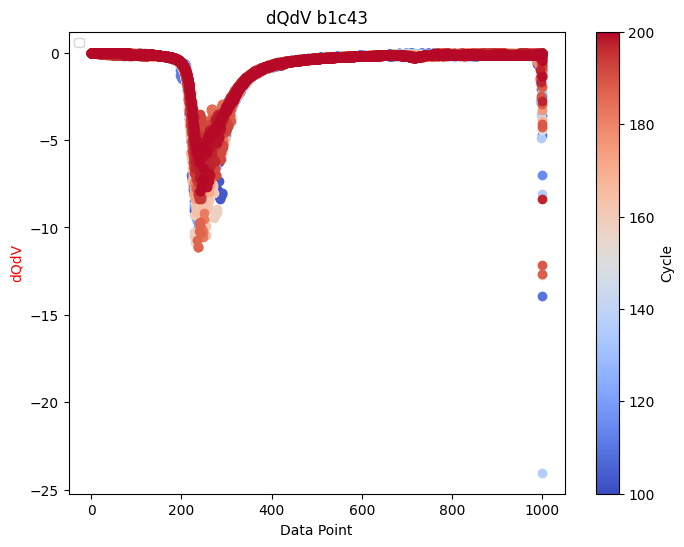

In [ ]:
ca.v2_plot_cycledata_per_cell(bat_dict, 'b1c43', 'dQdV', 100, 200)

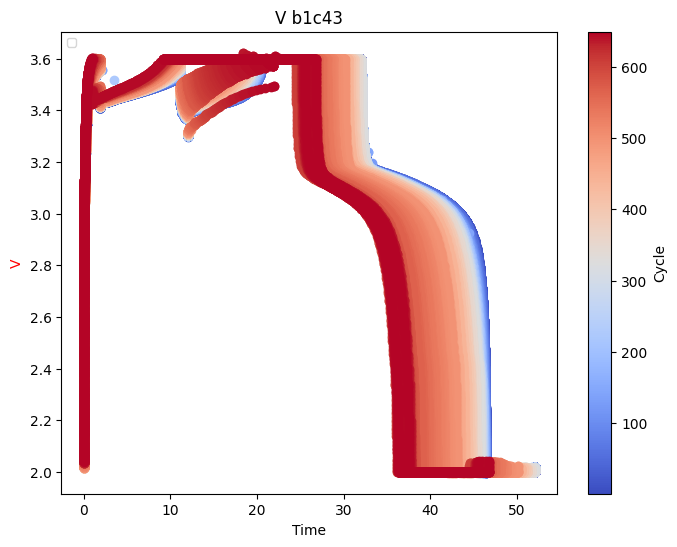

In [ ]:
ca.v2_plot_cycledata_per_cell(bat_dict, 'b1c43', 'V', 1, 2000)

This function generates scatter plots of a selected data key (dk) for multiple cells, each with different colors indicating the cycles. The data key is specified by dk_list, a list of data keys to be plotted. The start_cycle argument allows you to specify the starting cycle number, while the no_of_cycles argument specifies the total number of cycles to be plotted.

Parameters:
- bat_dict: a dictionary containing battery cycle data
- cell_keys: a list of cell keys to plot
- dk_list: a list of data keys to plot for each cell
- start_cycle: the cycle number to start plotting from
- no_of_cycles: the total number of cycles to plot


In [ ]:
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30

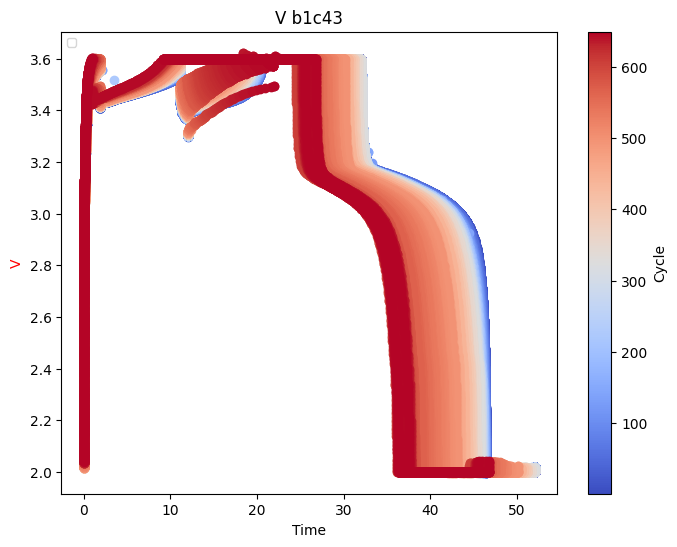

In [ ]:
ca.v2_plot_cycledata_per_cell(bat_dict, 'b1c43', 'V', 1, 2000)

To verify a cell, This function generates scatter plots of a selected data key (dk) for multiple cells, each with different colors indicating the cycles. The data key is specified by dk_list, a list of data keys to be plotted. The start_cycle argument allows you to specify the starting cycle number, while the no_of_cycles argument specifies the total number of cycles to be plotted.

Parameters:
- bat_dict: a dictionary containing battery cycle data
- cell_keys: a list of cell keys to plot
- dk_list: a list of data keys to plot for each cell
- start_cycle: the cycle number to start plotting from
- no_of_cycles: the total number of cycles to plot


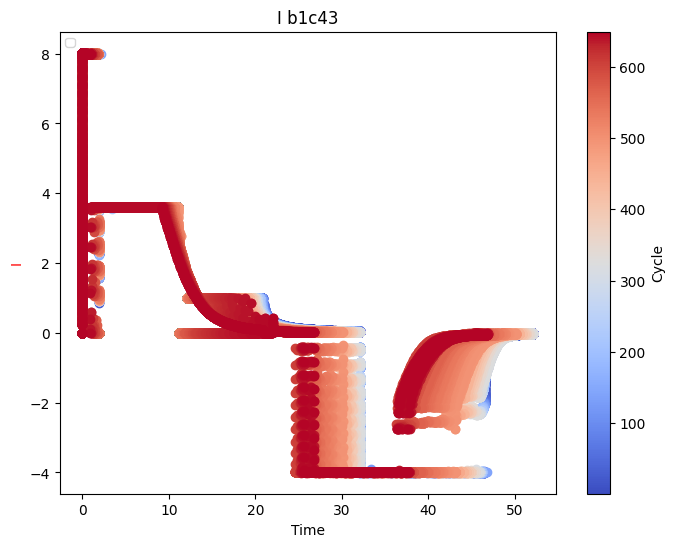

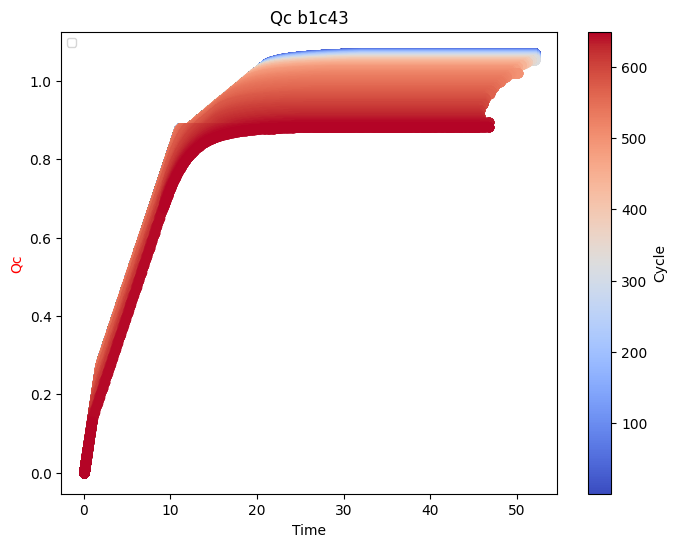

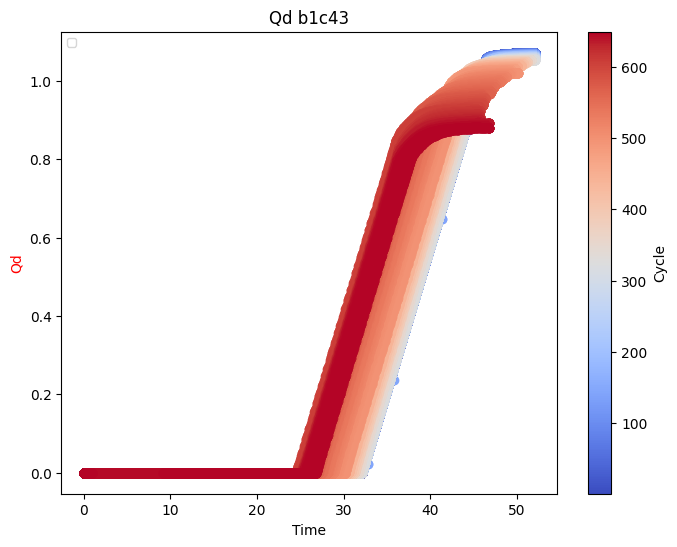

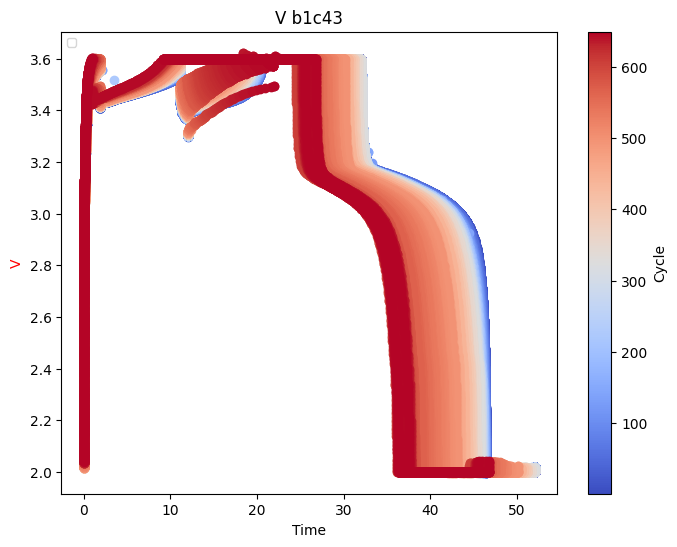

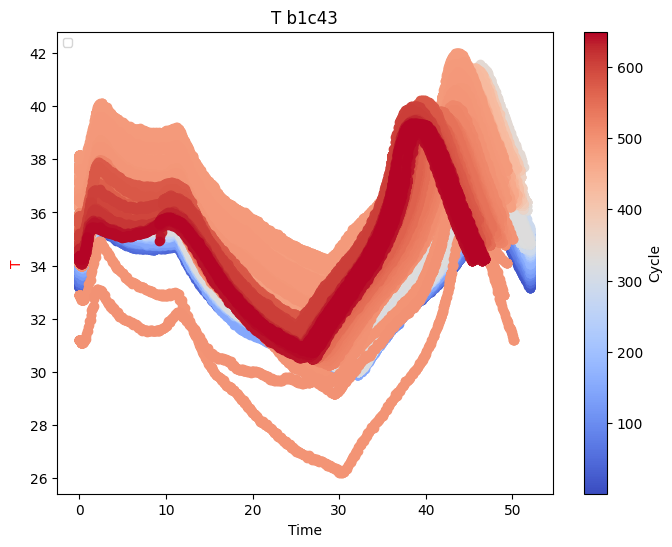

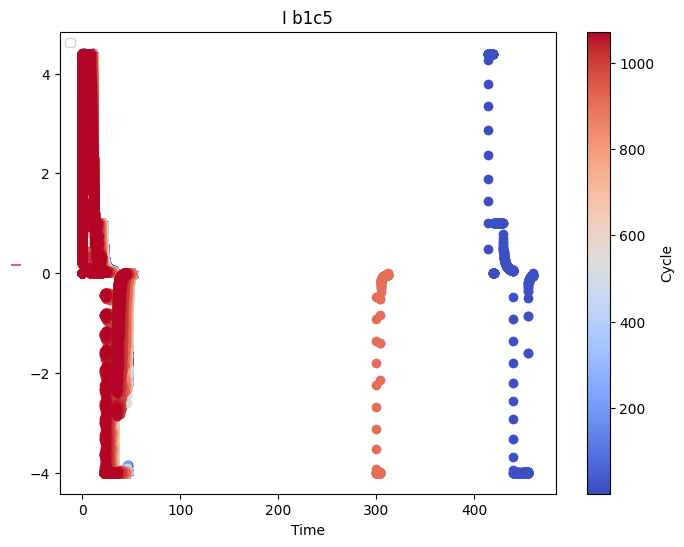

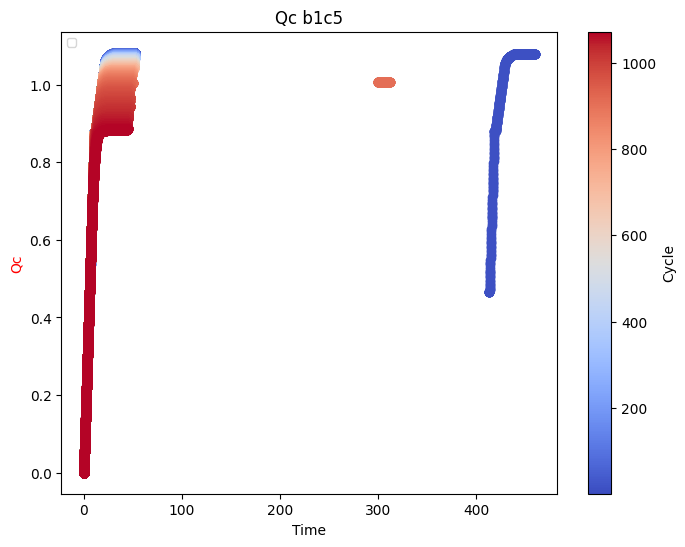

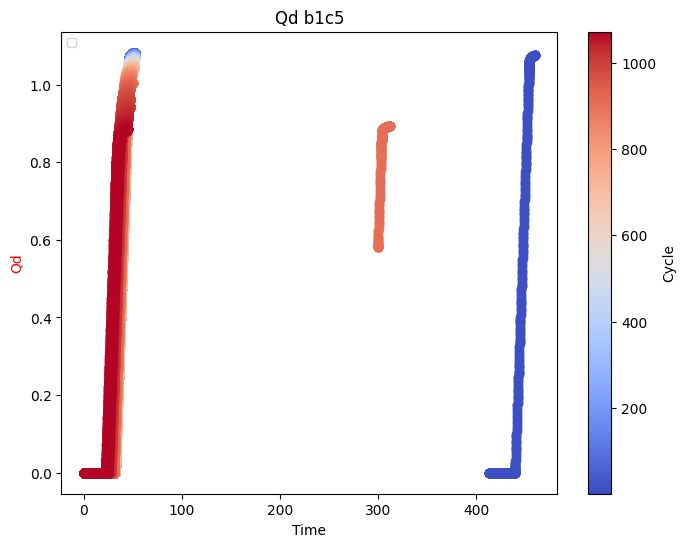

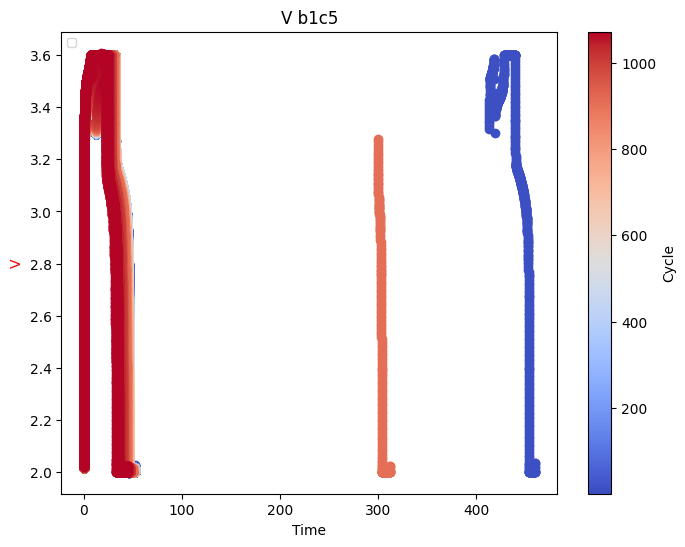

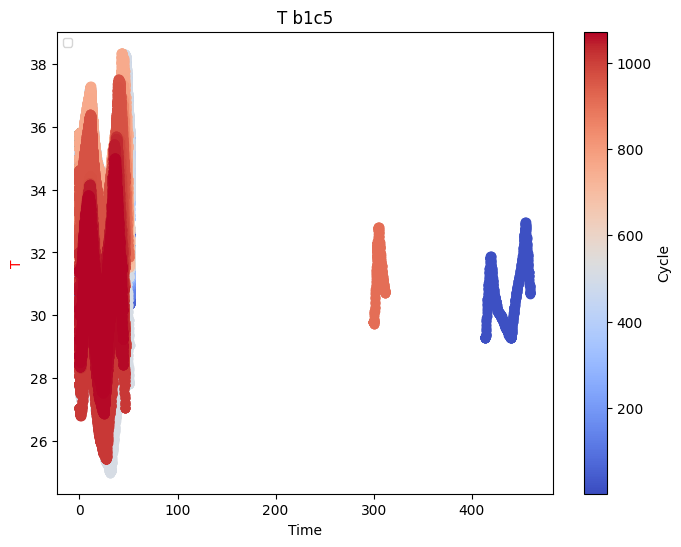

In [ ]:
#{'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}  </br>
cell_keys = ['b1c43', 'b1c5']
#dk_list = ['I', 'Qc', 'Qd', 'V', 'T', 'Qdlin', 'Tdlin', 'dQdV']
dk_list = ['I', 'Qc', 'Qd', 'V', 'T']
no_of_cycles = 2000
start_cycle = 1

ca.v2_plot_cycledata_multiple_cells(bat_dict, cell_keys, dk_list, start_cycle, no_of_cycles)

This function generates scatter plots of a selected data key (dk) for a cell and a cycle.

To verify a cycle (detail views), This function generates scatter plots of a selected data key (dk) for a cell and a cycle.

1102 1.0711148 1.0711148
1102 1.0531691 1.0710763
1102 2.0070486 2.0194225
1102 -3.999991454545454 0.0
1102 36.077698 33.290474
1000 1.0528219578469238 1.0528219578469238
1000 36.077703953961176 36.077703953961176
1000 -0.7217509467391705 -0.7217509467391705


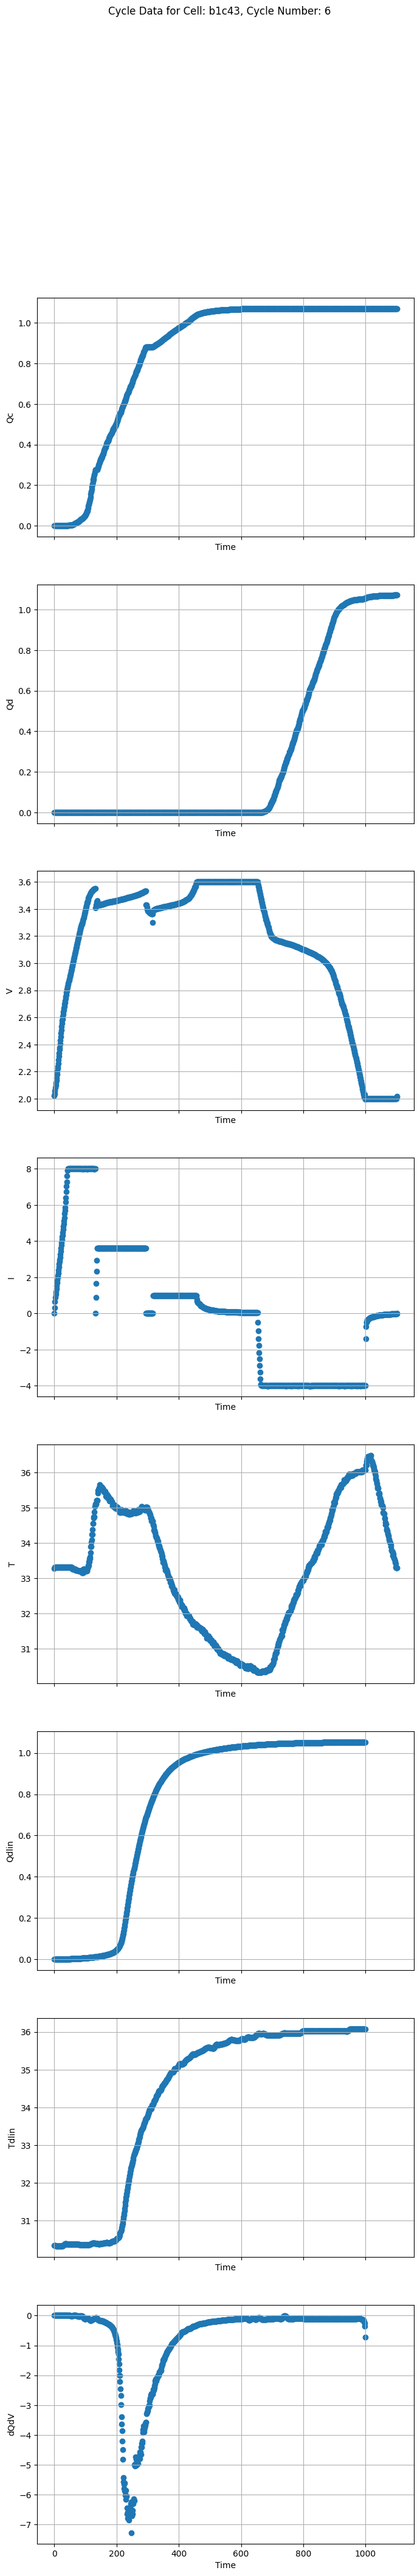

In [ ]:
ca.v1_plot_cycledata_per_cellandcycle(bat_dict, 'b1c43', ['Qc', 'Qd', 'V', 'I', 'T', 'Qdlin', 'Tdlin', 'dQdV'], 6)

This function, v2_plot_cycledata_per_cell, displays the cycle data with color-coded cycle numbers for a given cell and cycle number. The function takes in a battery dictionary bat_dict, a string cell_key which is the key for the cell in the dictionary, an optional list of data keys dk_list to plot on the right y-axis (if not provided, it defaults to an empty list), and an optional integer cycle_num representing the cycle number to plot (if not provided, it defaults to 2).

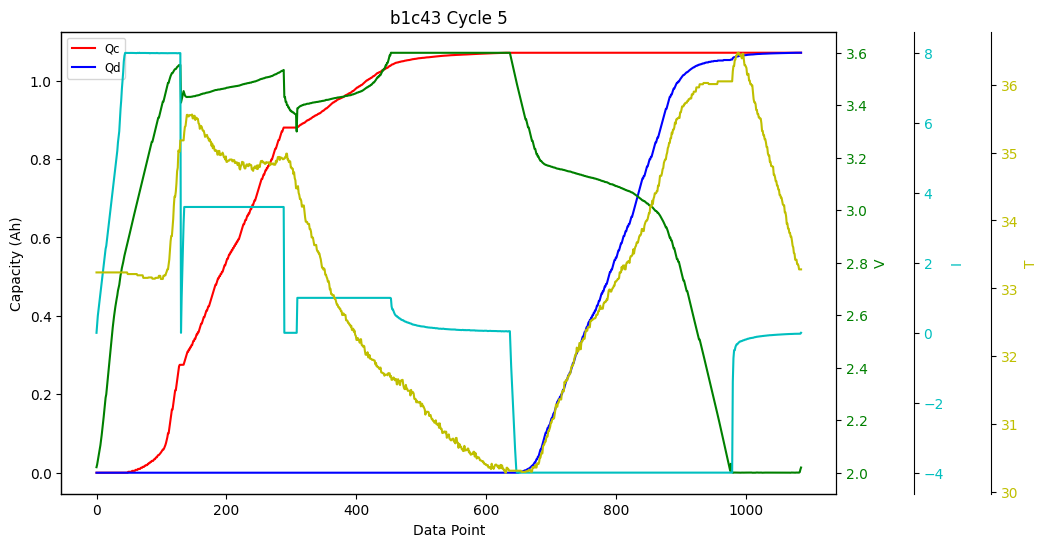

In [ ]:
ca.v2_plot_cycledata_per_cellandcycle(bat_dict, 'b1c43', ['V', 'I', 'T'], 5)

[1] Severson, K.A.; Attia, P.M.; Jin, N.; Perkins, N.; Jiang, B.; Yang, Z.; Chen, M.H.; Aykol, M.; Herring, P.K.; Fraggedakis, D.; et al. Data-Driven Prediction of Battery Cycle Life before Capacity Degradation. Nat Energy 2019, 4, 383–391, doi:10.1038/s41560-019-0356-8. [Data-driven prediction of battery cycle life before capacity degradation](https://github.com/rdbraatz/data-driven-prediction-of-battery-cycle-life-before-capacity-degradation.git)